#THE SPARKS FOUNDATION
##Task 1: Prediction using Supervised ML
####Prediction of percentage of marks of the student based on number of hours of study
##NAME: Chandu B L

#importing libraries required for the Task 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#collecting the data from the link provided

In [57]:
link = 'http://bit.ly/w-data'
data = pd.read_csv(link)
print("Data collection successfull")
data 

Data collection successfull


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#checking the first few records and last few records collected

In [58]:
 data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#description of the data collected 
###It includes the following information about the dataset collected:
####1.Count of the records in each column 
####2.Mean of the data in each column 
####3.Standard deviation of the data in each column
####4.Min and Max value 

In [60]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Data Visualization
###using matplotlib

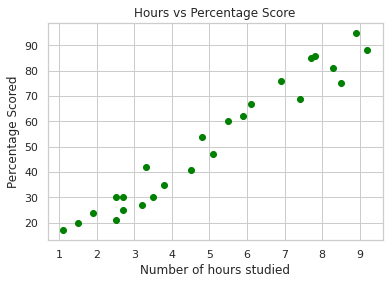

In [62]:
plt.title('Hours vs Percentage Score')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage Scored')
plt.scatter(data['Hours'], data['Scores'], color='green', marker='o')
plt.show()

##using seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


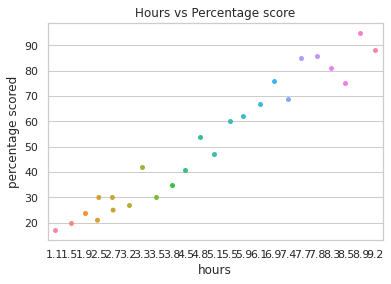

In [63]:
import seaborn as sb
x = data['Hours']
y = data['Scores']
sb.set(style = 'darkgrid')
sb.set(style = 'whitegrid')
plot = sb.stripplot(x,y)
plot.set(xlabel='hours', ylabel='percentage scored')
plt.title("Hours vs Percentage score")
plt.show()

In [64]:
plt.show()

#Linear Regression best fits the data
##Preparing the data

In [65]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [66]:
Y 

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

##Splitting the data into training and testing sets

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,
                                                     random_state = 0, 
                                                    test_size = 0.2)


#splitting the data into train and test set in the ratio 80:20

In [68]:
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("Y_train = ", Y_train.shape)
print("Y_test = ", Y_test.shape)

X_train =  (20, 1)
X_test =  (5, 1)
Y_train =  (20,)
Y_test =  (5,)


##Training the model

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , Y_train)
print("Training successfull")

Training successfull


##The equation is y = A*x + B

In [70]:
A = reg.coef_
B = reg.intercept_ 
print('A = ',A ,'\nb =',B)

A =  [9.91065648] 
b = 2.018160041434662


In [71]:
y = B + (A*X_train)

#Plotting the trained model

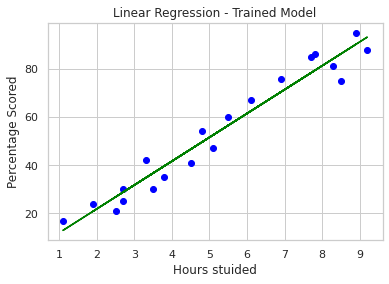

In [73]:
plt.title("Linear Regression - Trained Model")
plt.xlabel("Hours stuided")
plt.ylabel("Percentage Scored")
plt.scatter(X_train, Y_train, color="blue", marker='o')
plt.plot(X_train, y, color='green')
plt.show()

In [74]:
y_pred = reg.predict(X_test)

In [75]:
tf = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
tf

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Accuracy of the model

In [76]:
from sklearn import metrics
res = metrics.r2_score(Y_test, y_pred)
print("Accuracy = ", res*100)

Accuracy =  94.54906892105353


#If the student studies for 9.25 hours per day

In [77]:
hours = 9.25
pred = reg.predict([[hours]])
print("If the student studies for 9.25 hours per day then the percentage")
print("Scored is predicted to be = {}".format(pred[0]))

If the student studies for 9.25 hours per day then the percentage
Scored is predicted to be = 93.69173248737539


#Thank you